In [24]:
import spacy

# disabling tagger and parser of spacy for time considerations
nlp = spacy.load('en_core_web_sm', disable=[ "parser", "ner"])

import pandas as pd

In [105]:
# read in the test and training data to dataframes
trainingData = pd.read_csv("C:/Users/simon/Documents/AI/Foundatoins in AI - TU Dublin Course/Project/Project Data/train.csv")
testData = pd.read_csv("C:/Users/simon/Documents/AI/Foundatoins in AI - TU Dublin Course/Project/Project Data/test.csv")

In [5]:
print(trainingData.head())
print(testData.head())

   id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1  
      id                                              title  \
0  20800  Specter of Trump Loosens Tongues, if Not Purse...   
1  20801  Russian war

In [6]:
print("Training set Number of Rows and columns (Rows, Columns): ")
trainingData.shape

Training set Number of Rows and columns (Rows, Columns): 
Test set Number of Rows and columns (Rows, Columns): 


(5200, 4)

In [106]:
print("Test set Number of Rows and columns (Rows, Columns): ")
testData.shape

Test set Number of Rows and columns (Rows, Columns): 


(5200, 4)

In [5]:
trainingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


C:\Users\simon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

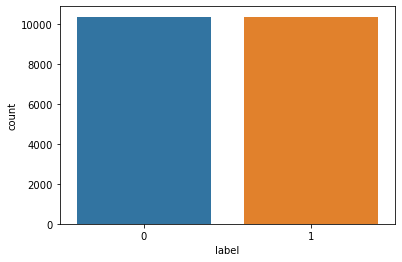

In [98]:
import seaborn  as sns

sns.countplot(trainingData['label'])

In [36]:
# Take test labels from submit csv dataframe and add them to the test dataframe (they were originally separate in two csv files)
testLabels = pd.read_csv('C:/Users/simon/Documents/AI/Foundatoins in AI - TU Dublin Course/Project/Project Data/submit.csv')
testData['labels'] = testLabels['label']
testData.head()

,id,title,author,text,labels
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...,1
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,0
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",1
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1


In [39]:
print("Training data nulls: ", trainingData['text'].isnull().sum())
print("Test data nulls: ", testData['text'].isnull().sum())

Training data nulls:  0
Test data nulls:  0


In [10]:
trainingData = trainingData.dropna(subset=['text'])
trainingData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20761 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20761 non-null  int64 
 1   title   20203 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20761 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 973.2+ KB


In [11]:
testData = testData.dropna(subset=['text'])
testData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5193 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5193 non-null   int64 
 1   title   5071 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 202.9+ KB


In [104]:
testData.shape

(5193, 5)

In [8]:
trainingData['text']

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        Ever get the feeling your life circles the rou...
2        Why the Truth Might Get You Fired October 29, ...
3        Videos 15 Civilians Killed In Single US Airstr...
4        Print \nAn Iranian woman has been sentenced to...
                               ...                        
20795    Rapper T. I. unloaded on black celebrities who...
20796    When the Green Bay Packers lost to the Washing...
20797    The Macy’s of today grew from the union of sev...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799      David Swanson is an author, activist, journa...
Name: text, Length: 20800, dtype: object

In [9]:
trainingData['text'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emai

## Removing Stop Words

In [10]:
print(nlp.Defaults.stop_words)

{'to', 'not', 'full', 'enough', 'this', 'may', 'third', 'part', 'seemed', 'via', 'go', 'nowhere', 'out', 'done', 'anyhow', 'toward', 'across', 'still', 'here', 'someone', 'fifteen', 'where', 'somewhere', '‘d', 'only', "'ll", 'first', 'am', 'whereby', 'at', "'s", 'does', 'whence', 'perhaps', 'amount', 'of', 'such', 'itself', 'could', 'anyone', 'thereafter', 'or', 'by', 'between', 'afterwards', 'five', 'too', 'below', 'if', 'some', 'last', 'nine', 'nothing', 'give', 'were', 'because', 'can', 'what', 'behind', 'ten', 'several', 'mine', 'except', 'before', 'say', 'hence', 'beforehand', 'seeming', 'about', 'a', 'was', 'n’t', 'one', 'something', 'always', '’d', 'so', 'indeed', 'often', 'nevertheless', 'namely', 'under', 'other', 'within', 'four', 'therefore', 'but', 'much', 'none', 'your', 'others', 'on', 'latterly', 'the', 'ever', '‘s', 'everything', 'same', 'own', 'used', 'empty', 'meanwhile', 'myself', 'with', 'which', 'next', 'become', 'do', 'you', 'therein', 'his', 'have', 'an', 'nobody

In [79]:
import re

def tokenizeAndNormalizeArticle(article):
    article_split = article.split()
    normalizedTokens = []
    
    for word in article_split:
        word = re.sub(r"[\n\t]*", "", word).strip()   # remove newlines, tabs and any additional spaces
        word = word.lower()                           # set to lower case
        if (nlp.vocab[word].is_stop == False):        # remove stop words
            normalizedTokens.append(word)
        word = re.sub('[^A-Za-z0-9]+', '', word)      # remove all special characters & punctutation
    
    return " ".join(normalizedTokens)


# call method removeStopWordsInTweet for each row of the text
# parameter to remove all stop words from the dataset
articleData = trainingData["text"]
normalizedArticleData = []

counter = 0
for article in articleData:
    if (type(article) is str):
        normalizedArticleData.append(tokenizeAndNormalizeArticle(article))

In [80]:
print(len(normalizedArticleData))

20761


In [81]:
# repeat for test data
articleData = testData["text"]
normalizedTestData = []

counter = 0
for article in articleData:
    if (type(article) is str):
        normalizedTestData.append(tokenizeAndNormalizeArticle(article))
        
print(len(normalizedTestData))

5193


In [17]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x241885ac860>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x241885c1e00>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x2418842fe20>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x241885ce460>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x24188620cc0>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x24188620b00>)]

# Vectorization

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer 
 
tfidfVectorizer=TfidfVectorizer(use_idf=True) 
 
# vectorize training & test data
xTrainingTf = tfidfVectorizer.fit_transform(normalizedArticleData)

xTestTf = tfidfVectorizer.transform(normalizedTestData)



MemoryError: Unable to allocate 27.9 GiB for an array with shape (20761, 180438) and data type float64

['00',
 '000',
 '0000',
 '000035',
 '0001',
 '00012',
 '0002',
 '000202',
 '000205',
 '0002062',
 '000billion',
 '000c',
 '000emails',
 '000ft',
 '000k',
 '000km',
 '000lb',
 '000m',
 '000mg',
 '000s',
 '000th',
 '000â',
 '001',
 '0011',
 '0012',
 '0013',
 '002',
 '0020143',
 '0023z',
 '0024',
 '003',
 '004',
 '004s',
 '005',
 '0054z',
 '0057',
 '005s',
 '006',
 '00684',
 '006s',
 '007',
 '007s',
 '008',
 '008s',
 '009',
 '0099',
 '00am',
 '00o',
 '00p',
 '00pm',
 '00μg',
 '01',
 '010',
 '0101',
 '0102',
 '0107y',
 '011s',
 '012',
 '0128',
 '013',
 '0134',
 '0135y',
 '013c2812c9',
 '014',
 '015',
 '016',
 '016e5d9ff252f2444790d05269f4ed90',
 '016s',
 '017',
 '018',
 '019',
 '01915',
 '01am',
 '01pm',
 '01s',
 '01welcome',
 '02',
 '020',
 '0200gmt',
 '021',
 '022',
 '023',
 '0235',
 '024',
 '025',
 '026',
 '027',
 '02714',
 '028',
 '02863',
 '02870',
 '029',
 '02pm',
 '02welcome',
 '03',
 '030',
 '031',
 '032',
 '0325',
 '033',
 '0331',
 '033s',
 '034',
 '035',
 '036',
 '03747',
 '038',

# Applying Naive Bayes

Applying Naive Bayes Model:
----------------------------
accuracy:   0.582
              precision    recall  f1-score   support

    Positive       0.53      0.73      0.61      2339
    Negative       0.68      0.46      0.55      2854

    accuracy                           0.58      5193
   macro avg       0.60      0.60      0.58      5193
weighted avg       0.61      0.58      0.58      5193


Time taken to apply model: 0.262702 seconds


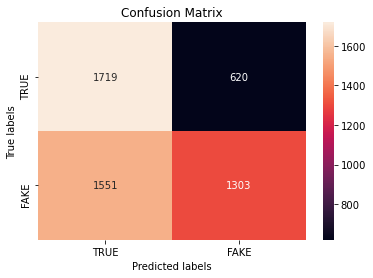

In [101]:
from time import time
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

t = time()

yTraining = trainingData['label']
naiveBayesClassifier = MultinomialNB()
naiveBayesClassifier.fit(xTrainingTf, yTraining)

# predict the new document from the testing dataset
yPredictions = naiveBayesClassifier.predict(xTestTf)
yTest = testData['labels']

print("Applying Naive Bayes Model:")
print("----------------------------")

# compute the performance measures
score1 = metrics.accuracy_score(yTest, yPredictions)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(yTest, yPredictions,
     target_names=['Positive', 'Negative']))

naiveBayesConfusionMatrix = metrics.confusion_matrix(yTest, yPredictions)

ax= plt.subplot()
sns.heatmap(naiveBayesConfusionMatrix, annot=True, fmt='g', ax=ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['TRUE', 'FAKE']); 
ax.yaxis.set_ticklabels(['TRUE', 'FAKE']);


duration = time() - t
print("\nTime taken to apply model: %f seconds" % (duration))

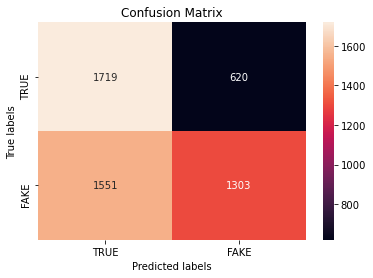

In [100]:
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(naiveBayesConfusionMatrix, annot=True, fmt='g', ax=ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['TRUE', 'FAKE']); 
ax.yaxis.set_ticklabels(['TRUE', 'FAKE']);

accuracy:   0.582
              precision    recall  f1-score   support

    Positive       0.53      0.73      0.61      2339
    Negative       0.68      0.46      0.55      2854

    accuracy                           0.58      5193
   macro avg       0.60      0.60      0.58      5193
weighted avg       0.61      0.58      0.58      5193

confusion matrix:
[[1719  620]
 [1551 1303]]
------------------------------


# Random Forrest Classifier

Applying Random Forrest Model:
-------------------------------
accuracy:   0.668
              precision    recall  f1-score   support

    Positive       0.61      0.71      0.66      2339
    Negative       0.73      0.63      0.68      2854

    accuracy                           0.67      5193
   macro avg       0.67      0.67      0.67      5193
weighted avg       0.68      0.67      0.67      5193


Time taken to apply model: 36.406860 seconds


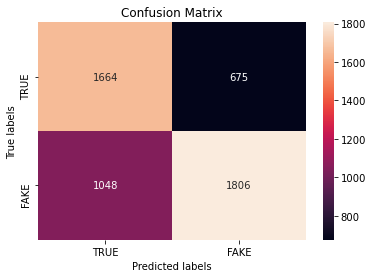

In [102]:
from sklearn.ensemble import RandomForestClassifier

t = time()
randomForrestClassifier = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
randomForrestClassifier.fit(xTrainingTf, yTraining)
yPredictions = randomForrestClassifier.predict(xTestTf)

print("Applying Random Forrest Model:")
print("-------------------------------")

# compute the performance measures
score1 = metrics.accuracy_score(yTest, yPredictions)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(yTest, yPredictions,
     target_names=['Positive', 'Negative']))

randomForrestConfusionMatrix = metrics.confusion_matrix(yTest, yPredictions)

ax= plt.subplot()
sns.heatmap(randomForrestConfusionMatrix, annot=True, fmt='g', ax=ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['TRUE', 'FAKE']); 
ax.yaxis.set_ticklabels(['TRUE', 'FAKE']);

duration = time() - t
print("\nTime taken to apply model: %f seconds" % (duration))

# Applying SVM Model Classifier

Applying SVM Model:
----------------------------
accuracy:   0.637
              precision    recall  f1-score   support

    Positive       0.59      0.65      0.62      2339
    Negative       0.69      0.62      0.65      2854

    accuracy                           0.64      5193
   macro avg       0.64      0.64      0.64      5193
weighted avg       0.64      0.64      0.64      5193


Time taken to apply model: 1305.187009 seconds


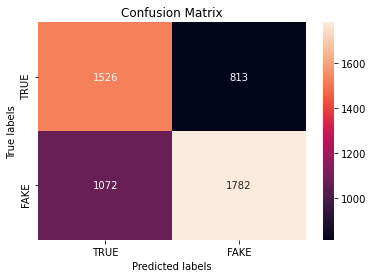

In [103]:
from sklearn import svm

#Create a svm Classifier
svmClassifier = svm.SVC(kernel='linear') # Linear Kernel

# Perform training for the svm model
svmClassifier.fit(xTrainingTf, yTraining)

# Predict the response for test dataset 
yPredictions = svmClassifier.predict(xTestTf)

print("Applying SVM Model:")
print("----------------------------")

# compute the performance measures
score1 = metrics.accuracy_score(yTest, yPredictions)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(yTest, yPredictions,
     target_names=['Positive', 'Negative']))

svmConfusionMatrix = metrics.confusion_matrix(yTest, yPredictions)

ax= plt.subplot()
sns.heatmap(svmConfusionMatrix, annot=True, fmt='g', ax=ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['TRUE', 'FAKE']); 
ax.yaxis.set_ticklabels(['TRUE', 'FAKE']);

duration = time() - t
print("\nTime taken to apply model: %f seconds" % (duration))